In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
import os
from matplotlib import *
import sys
from pylab import *

# visual libraries
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import pylab as pl
plt.style.use('ggplot')

# sklearn libraries
import sklearn 
plt.style.use('ggplot')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#Importing Dataset
data = pd.read_csv('card.csv', sep=',', skiprows=range(0, 1))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Renaming the column names
data.rename(columns = {'PAY_0' : 'STATUS_SEP'}, inplace = True)
data.rename(columns = {'PAY_2' : 'STATUS_AUG'}, inplace = True)
data.rename(columns = {'PAY_3' : 'STATUS_JUL'}, inplace = True)
data.rename(columns = {'PAY_4' : 'STATUS_JUN'}, inplace = True)
data.rename(columns = {'PAY_5' : 'STATUS_MAY'}, inplace = True)
data.rename(columns = {'PAY_6' : 'STATUS_APR'}, inplace = True)
data.rename(columns = {'BILL_AMT1' : 'BILL_SEP'}, inplace = True)
data.rename(columns = {'BILL_AMT2' : 'BILL_AUG'}, inplace = True)
data.rename(columns = {'BILL_AMT3' : 'BILL_JUL'}, inplace = True)
data.rename(columns = {'BILL_AMT4' : 'BILL_JUN'}, inplace = True)
data.rename(columns = {'BILL_AMT5' : 'BILL_MAY'}, inplace = True)
data.rename(columns = {'BILL_AMT6' : 'BILL_APR'}, inplace = True)
data.rename(columns = {'PAY_AMT1' : 'PAY_SEP'}, inplace = True)
data.rename(columns = {'PAY_AMT2' : 'PAY_AUG'}, inplace = True)
data.rename(columns = {'PAY_AMT3' : 'PAY_JUL'}, inplace = True)
data.rename(columns = {'PAY_AMT4' : 'PAY_JUN'}, inplace = True)
data.rename(columns = {'PAY_AMT5' : 'PAY_MAY'}, inplace = True)
data.rename(columns = {'PAY_AMT6' : 'PAY_APR'}, inplace = True)
data.rename(columns = {'default payment next month' : 'default'}, inplace = True)

In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'STATUS_SEP',
       'STATUS_AUG', 'STATUS_JUL', 'STATUS_JUN', 'STATUS_MAY', 'STATUS_APR',
       'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR',
       'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
       'default'],
      dtype='object')

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Determining if there are null values in each attribute

In [8]:
data.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
STATUS_SEP    0
STATUS_AUG    0
STATUS_JUL    0
STATUS_JUN    0
STATUS_MAY    0
STATUS_APR    0
BILL_SEP      0
BILL_AUG      0
BILL_JUL      0
BILL_JUN      0
BILL_MAY      0
BILL_APR      0
PAY_SEP       0
PAY_AUG       0
PAY_JUL       0
PAY_JUN       0
PAY_MAY       0
PAY_APR       0
default       0
dtype: int64

Finding the distrition of attributes

In [9]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Education vs Count')

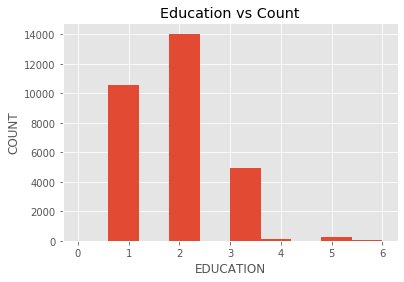

In [10]:
data['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('Education vs Count')

In [11]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marital Status vs Count')

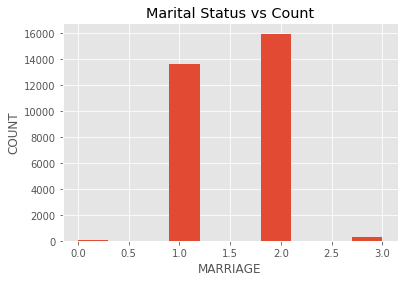

In [12]:
data['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('Marital Status vs Count')

In [13]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'SEX vs Count')

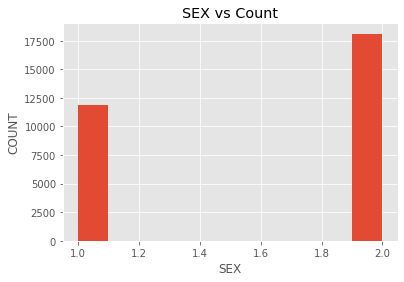

In [14]:
data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX vs Count')

Checking if the data is balanced or not

0    23364
1     6636
Name: default, dtype: int64

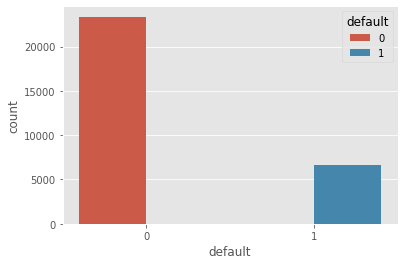

In [15]:
sns.countplot(x='default', data=data,hue="default")
data.default.value_counts()

Checking if the data is balanced or not

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

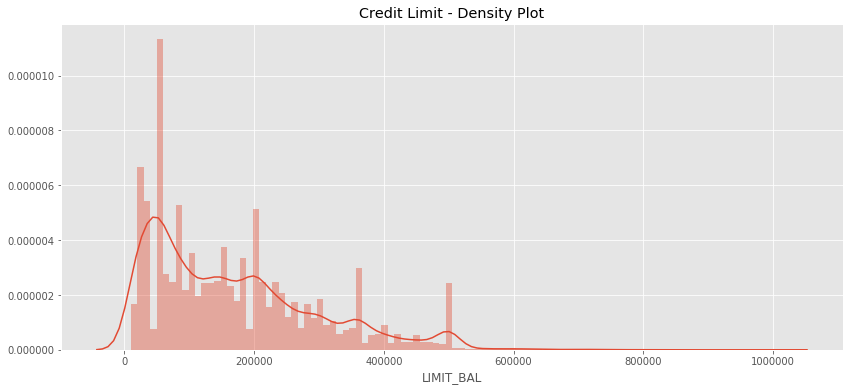

In [16]:
plt.figure(figsize = (14,6))
plt.title('Credit Limit - Density Plot') 
sns.distplot(data['LIMIT_BAL'],kde=True,bins=100)
data['LIMIT_BAL'].value_counts()

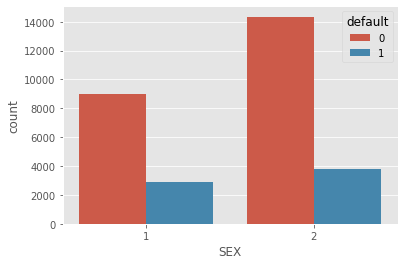

In [17]:
sns.countplot(x='SEX', data=data,hue="default")

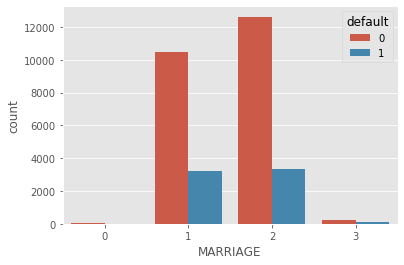

In [18]:
sns.countplot(x="MARRIAGE", data=data,hue="default")

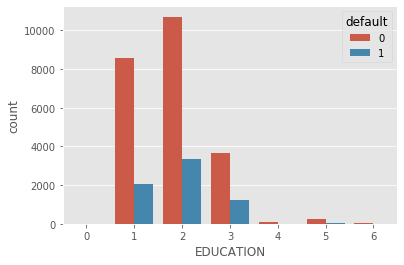

In [19]:
sns.countplot(x="EDUCATION", data=data, hue="default")

In [20]:
pay_status_columns = data.columns[6:12]
pay_status_columns[1]

len(pay_status_columns)

6

Distribution of continuous variables

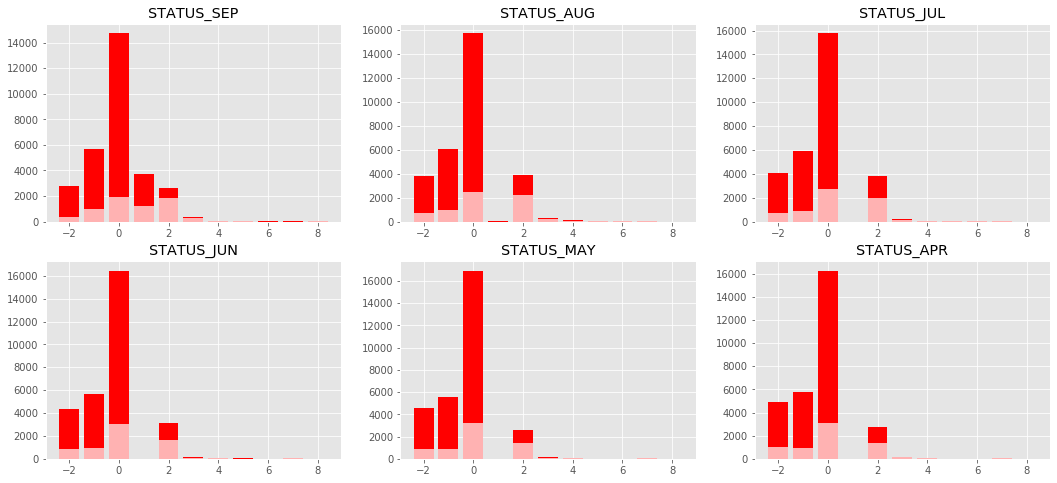

In [22]:
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = data[pay_status_columns[i]].value_counts()
    x = data[pay_status_columns[i]][(data['default']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='white', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
    
plt.show()

In [21]:
pay_amt_col = data.columns[18:24]
pay_amt_col

Index(['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], dtype='object')

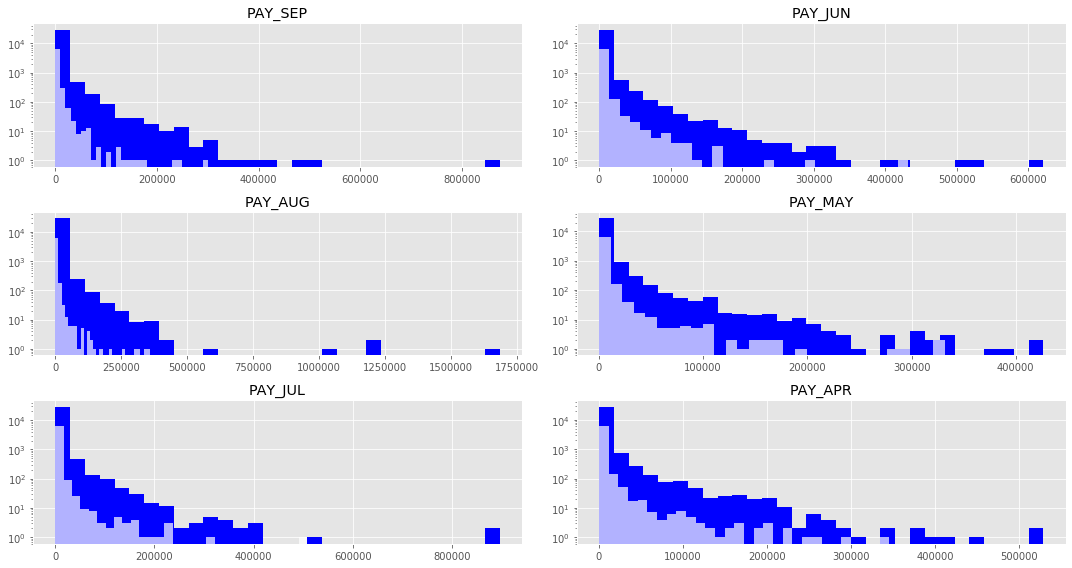

In [23]:
#Amount of previous payment

figure, ax = plt.subplots(3,2)
figure.set_size_inches(15,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[pay_amt_col[i]], 30, color ='blue', label = "default")
    ax[row,col].hist(data[pay_amt_col[i]][(data['default']==1)],30,color='white',alpha = 0.7, label ="not-default")
    ax[row,col].set_title(pay_amt_col[i])
    #adding scale
    ax[row,col].set_yscale('log', nonposy='clip')
    
plt.tight_layout()
plt.show() 

In [24]:
bill_atm_col = data.columns[12:18]
bill_atm_col

Index(['BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR'], dtype='object')

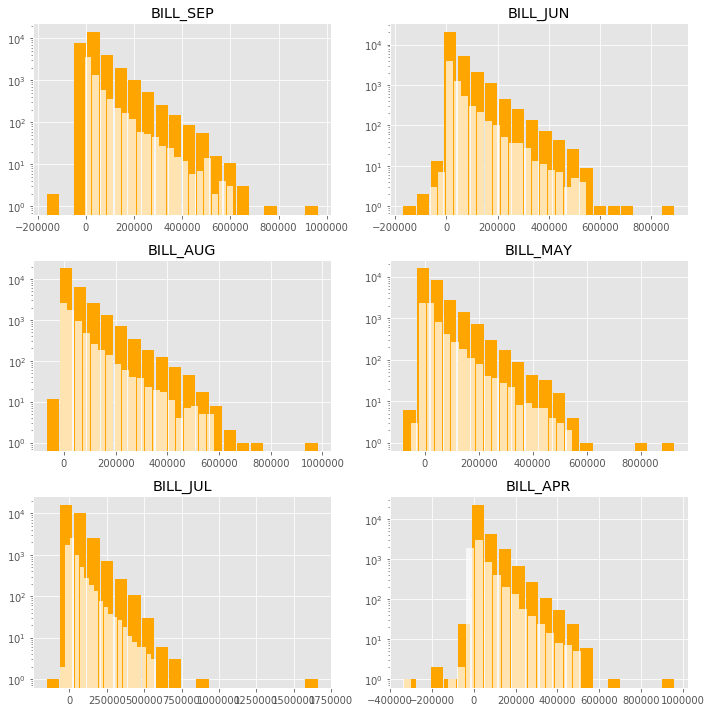

In [25]:
#Bill statement
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)

for i in range(len(bill_atm_col)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(data[bill_atm_col[i]], 20,rwidth=0.9, color ='orange')
    ax[row,col].hist(data[bill_atm_col[i]][(data['default']==1)],20,rwidth=0.9,color='white',alpha = 0.7)
    ax[row,col].set_title(bill_atm_col[i])
    #adding scale
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [26]:
#corr_matrix
corr_matrix = data.corr()

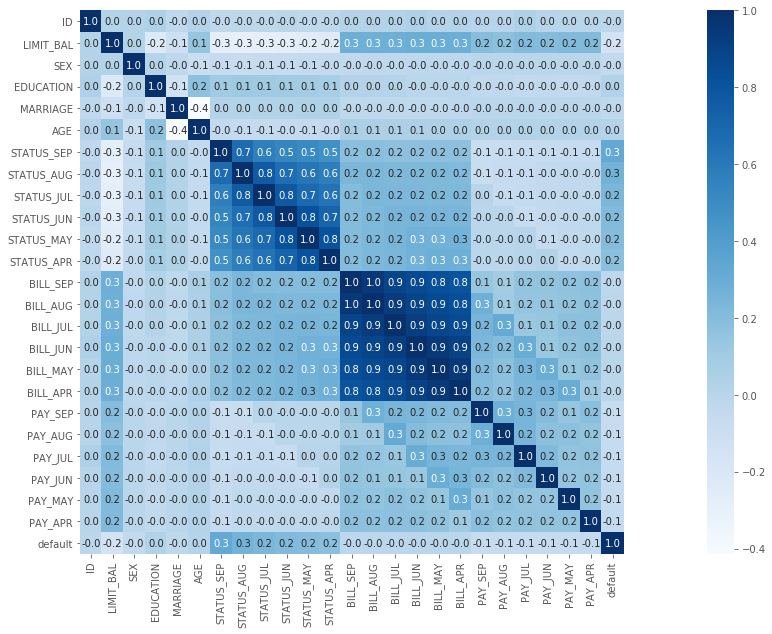

In [27]:
#plotting corr heatmap

plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, square=True, cmap='Blues',annot=True, fmt = ".1f") 

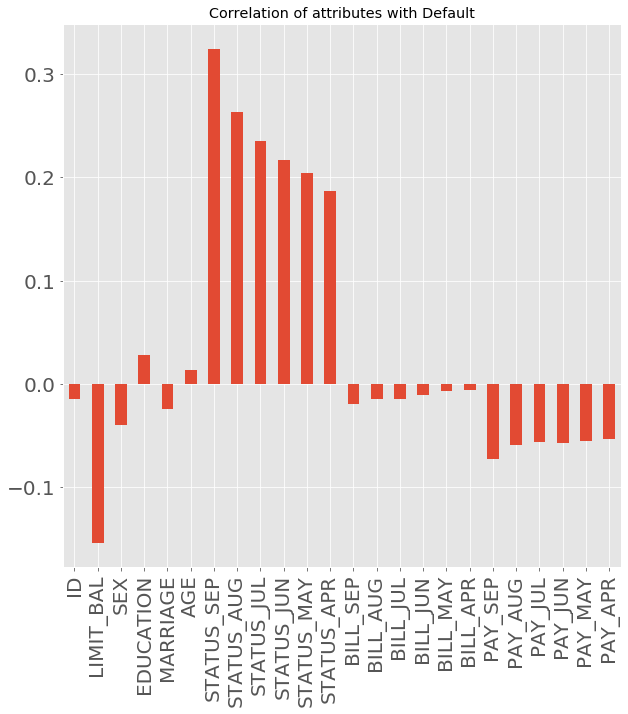

In [28]:
#plotting individual corr wrt default
X = data.drop(['default'],axis=1)
X.corrwith(data['default']).plot.bar(figsize = (10, 10), title = "Correlation of attributes with Default", 
                                        fontsize = 20,rot = 90, grid = True)

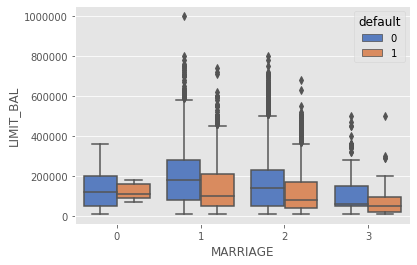

In [29]:
sns.boxplot(x='MARRIAGE',hue='default', y='LIMIT_BAL',data=data,palette="muted")

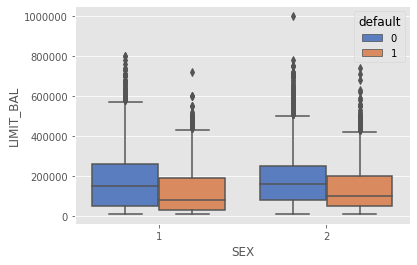

In [30]:
sns.boxplot(x='SEX',hue='default', y='LIMIT_BAL',data=data,palette="muted")

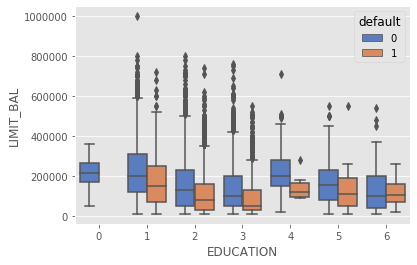

In [31]:
sns.boxplot(x='EDUCATION',hue='default', y='LIMIT_BAL',data=data,palette="muted")

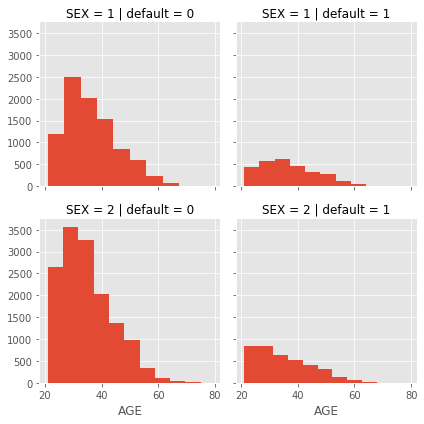

In [32]:
g = sns.FacetGrid(data, col = 'default', row = 'SEX')
g.map(plt.hist, 'AGE')

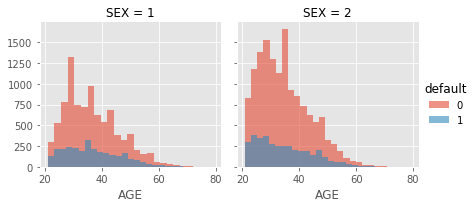

In [33]:
g = sns.FacetGrid(data, col='SEX', hue='default')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

## 1) CHECKING FOR DUPLICATES AND SET ID AS INDEX

In [34]:
#Check if there are any duplicates ID
data[data["ID"].duplicated()] #no duplicate IDs

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default


In [35]:
data.set_index('ID', inplace = True)

## 2) RENAMING COLUMN NAMES FOR BETTER INTERPRETATION

In [36]:
#Renaming the data column for better understanding of the dataset
data.rename(columns = {'PAY_0' : 'STATUS_SEP'}, inplace = True)
data.rename(columns = {'PAY_2' : 'STATUS_AUG'}, inplace = True)
data.rename(columns = {'PAY_3' : 'STATUS_JUL'}, inplace = True)
data.rename(columns = {'PAY_4' : 'STATUS_JUN'}, inplace = True)
data.rename(columns = {'PAY_5' : 'STATUS_MAY'}, inplace = True)
data.rename(columns = {'PAY_6' : 'STATUS_APR'}, inplace = True)
data.rename(columns = {'BILL_AMT1' : 'BILL_SEP'}, inplace = True)
data.rename(columns = {'BILL_AMT2' : 'BILL_AUG'}, inplace = True)
data.rename(columns = {'BILL_AMT3' : 'BILL_JUL'}, inplace = True)
data.rename(columns = {'BILL_AMT4' : 'BILL_JUN'}, inplace = True)
data.rename(columns = {'BILL_AMT5' : 'BILL_MAY'}, inplace = True)
data.rename(columns = {'BILL_AMT6' : 'BILL_APR'}, inplace = True)
data.rename(columns = {'PAY_AMT1' : 'PAY_SEP'}, inplace = True)
data.rename(columns = {'PAY_AMT2' : 'PAY_AUG'}, inplace = True)
data.rename(columns = {'PAY_AMT3' : 'PAY_JUL'}, inplace = True)
data.rename(columns = {'PAY_AMT4' : 'PAY_JUN'}, inplace = True)
data.rename(columns = {'PAY_AMT5' : 'PAY_MAY'}, inplace = True)
data.rename(columns = {'PAY_AMT6' : 'PAY_APR'}, inplace = True)
data.rename(columns = {'default payment next month' : 'default'}, inplace = True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3) MERGING UNDOCUMENTED VALUES
We observed that EDUCATION contains values 0, 5 and 6, marriage contains values which are undocumented. We could choose to remove these data, however, it is unwise as they contribute to a large amount of data. Hence, we will keep these data and put them under “others” category.

Likewise, we observed that MARRIAGE contains value 0 which is undocumented. Hence, we will keep and put them under “others” category.

For STATUS_SEP to STATUS_APR, we observed that they contained values -2 which is undocumented. If values 1,2 ,3 … represents the months of delay, we should see every negative value as ‘pay duly’, hence, we will merge -2 and -1 to 0, which represents ‘pay duly’.

In [37]:
data['EDUCATION'].replace(5,4, inplace=True)
data['EDUCATION'].replace(6,4, inplace=True)
data['EDUCATION'].replace(0,4, inplace=True)

In [38]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [39]:
data['MARRIAGE'].replace(0,3, inplace=True)

In [40]:
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [41]:
data['STATUS_SEP'].replace(-1,0, inplace=True)
data['STATUS_SEP'].replace(-2,0, inplace=True)
data['STATUS_AUG'].replace(-1,0, inplace=True)
data['STATUS_AUG'].replace(-2,0, inplace=True)
data['STATUS_JUL'].replace(-1,0, inplace=True)
data['STATUS_JUL'].replace(-2,0, inplace=True)
data['STATUS_JUN'].replace(-1,0, inplace=True)
data['STATUS_JUN'].replace(-2,0, inplace=True)
data['STATUS_MAY'].replace(-1,0, inplace=True)
data['STATUS_MAY'].replace(-2,0, inplace=True)
data['STATUS_APR'].replace(-1,0, inplace=True)
data['STATUS_APR'].replace(-2,0, inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [42]:
data.STATUS_SEP.value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: STATUS_SEP, dtype: int64

## 4) REORDER EDUCATION RANKING
We have also identified that for Education, the dataset did not rank the attributes in the correct hierarchy ranking.

High school should come before university. Therefore, we re-ordered the education data to be 1 = graduate school; 2 = high school, 3 = university, 4 = others.

For our models, we will assume value 4 to be higher university education.

In [43]:
#1 = Graduate School
#2 = High School
#3 = University 
#4 = Others (Assuming Higher University Education)

data['EDUCATION'].replace(2,4, inplace=True)
data['EDUCATION'].replace(3,2, inplace=True)
data['EDUCATION'].replace(4,3, inplace=True)

## 5) FEATURE SELECTION - CHI2 TEST FOR CATEGORICAL VARIABLES
We will do CHI2 pairing test for all categorical data and for each pairing that has a p-value > 0.05, we will select 1 feature to be removed from the dataset.

In [44]:
df = data[data.columns[1:11]]
df1 = data[data.columns[-1]]
df2 = pd.concat([df,df1], axis = 1)
df2.drop(columns = ['AGE'], inplace = True)

for i in range(10):
    for j in range(i+1,10):
        feature1 = df2.columns[i]
        feature2 = df2.columns[j]
        if (chi2_contingency(pd.crosstab(df2[feature1], df2[feature2]))[1]) > 0.05:
            print("CHI2 Test for " + str(feature1) + "," + str(feature2) + " " + "\n" + 
                  str(chi2_contingency(pd.crosstab(df2[feature1], df2[feature2]))[1])+ "\n\n")

CHI2 Test for MARRIAGE,STATUS_SEP 
0.16366393769741636


CHI2 Test for MARRIAGE,STATUS_AUG 
0.5382357625680236


CHI2 Test for MARRIAGE,STATUS_JUL 
0.7522661470736393


CHI2 Test for MARRIAGE,STATUS_JUN 
0.7869203621656663


CHI2 Test for MARRIAGE,STATUS_MAY 
0.9251161404865955


CHI2 Test for MARRIAGE,STATUS_APR 
0.974160436758886




Since Marriage appears in all pairings that have p-value > 0.05, we remove MARRIAGE from the dataset

In [45]:
data.drop(columns = ['MARRIAGE'], inplace = True)

## 6) FEATURE SELECTION - CORRELATION TEST FOR CONTINUOUS DATA
The correlation table shown below shows that the data contains high degree of multicollinearity for BILL columns

Multicollinearity can cause problems when we fit the model later interpret the results.

It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

In [46]:
corr = data[data.columns[10:22]].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
BILL_SEP,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AUG,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_JUL,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_JUN,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_MAY,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_APR,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_SEP,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AUG,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
PAY_JUL,0.156887,0.150718,0.130011,0.300023,0.252305,0.233770,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740
PAY_JUN,0.158303,0.147398,0.143405,0.130191,0.293118,0.250237,0.199558,0.180107,0.216325,1.000000,0.151830,0.157834


In [47]:
corr = data[data.columns[10:16]].corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(6):
    for j in range(i+1,6):
        feature1 = corr.columns[i]
        feature2 = corr.columns[j]
        if (corr.iloc[i,j]) > 0.9 and corr.iloc[i,j] != 1: 
            print("Correlation for " + str(feature1) + "," + str(feature2) + " " + "\n" + str(corr.iloc[i,j]) +"\n")

Correlation for BILL_SEP,BILL_AUG 
0.9514836727518374

Correlation for BILL_AUG,BILL_JUL 
0.9283262592714886

Correlation for BILL_JUL,BILL_JUN 
0.9239694565909764

Correlation for BILL_JUN,BILL_MAY 
0.9401344040880266

Correlation for BILL_JUN,BILL_APR 
0.9009409547979025

Correlation for BILL_MAY,BILL_APR 
0.9461968070522464



**Therefore, we will only keep BILL_SEP as it has the least number of occurances in the number of pairings that have correlation of > 0.9.**

In [48]:
#Dropping all BILLs except BILL_SEP
data.drop(columns = ['BILL_JUL','BILL_JUN', 'BILL_AUG', 'BILL_MAY', 'BILL_APR'], inplace = True)

## 7) DATA ENCODING
We will only encode SEX because it is nominal categorical data

In [49]:
data['SEX'].replace(1,'MALE', inplace=True)
data['SEX'].replace(2,'FEMALE', inplace=True)
dummies = pd.get_dummies(data=data, columns=['SEX'])
data = dummies
cols_at_end = ['default']
data = data[[c for c in data if c not in cols_at_end] + [c for c in cols_at_end if c in data]]
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_SEP,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,default
ID,,,,,,,,,,,,,,,,,,,
1,20000,3,24,2,2,0,0,0,0,3913,0,689,0,0,0,0,1,0,1
2,120000,3,26,0,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1,0,1
3,90000,3,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,1,0,0
4,50000,3,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,1,0,0
5,50000,3,57,0,0,0,0,0,0,8617,2000,36681,10000,9000,689,679,0,1,0


## 8) FEATURE SCALING OF CONTINUOUS DATA
This will help to limit the range and standerdise the variables so that they can all be compared on common grounds. If they do not have the same scale, it will cause problems to the machine learning that we will be applying later on(as most machine learning models is based on euclidean distance). This algorithm will also converge faster.

In [50]:
data['LIMIT_BAL'] = StandardScaler().fit_transform(data['LIMIT_BAL'].values.reshape(-1,1))
data['AGE'] = StandardScaler().fit_transform(data['AGE'].values.reshape(-1,1))
data['BILL_SEP'] = StandardScaler().fit_transform(data['BILL_SEP'].values.reshape(-1,1))
data['PAY_SEP'] = StandardScaler().fit_transform(data['PAY_SEP'].values.reshape(-1,1))
data['PAY_AUG'] = StandardScaler().fit_transform(data['PAY_AUG'].values.reshape(-1,1))
data['PAY_JUL'] = StandardScaler().fit_transform(data['PAY_JUL'].values.reshape(-1,1))
data['PAY_JUN'] = StandardScaler().fit_transform(data['PAY_JUN'].values.reshape(-1,1))
data['PAY_MAY'] = StandardScaler().fit_transform(data['PAY_MAY'].values.reshape(-1,1))
data['PAY_APR'] = StandardScaler().fit_transform(data['PAY_APR'].values.reshape(-1,1))

In [51]:
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_SEP,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,default
ID,,,,,,,,,,,,,,,,,,,
1,-1.136720,3,-1.246020,2,2,0,0,0,0,-0.642501,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,0,1
2,-0.365981,3,-1.029047,0,2,0,0,0,2,-0.659219,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,0,1
3,-0.597202,3,-0.161156,0,0,0,0,0,0,-0.298560,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,0,0
4,-0.905498,3,0.164303,0,0,0,0,0,0,-0.057491,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,0,0
5,-0.905498,3,2.334029,0,0,0,0,0,0,-0.578618,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1,0


## 9) SPLITTING TRAINING AND TEST SET
We then split the processed data into training set (80%) and test set(20%)

In [52]:
#spliiting test and train set to a 80:20 ratio 

from sklearn.model_selection import train_test_split
x = data.iloc[:, :-1].values
y = data["default"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## MODEL SELECTION AND EVALUATION

For this part, we plan to first run the model with default parameters. After that, we will run GridSearch to find the optimised parameters. We will then run our model with new parameters to check for improvements. 

We will be evaluating models by looking at the confusion matrix, classification report, accuracy, precision, recall, f1_score, ROC and AUROC. We will be focusing on accurarcy, f1_score and AUROC. 

## SVM MODELS

**RBF KERNEL**

In [53]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [54]:
#RBF Kernel
rbf_svc = SVC(kernel = 'rbf', gamma = 'auto', probability = True)
rbf_svc.fit(x_train,y_train)

#Predict
y_rbf_pred = rbf_svc.predict(x_test)

In [55]:
#Evaluation
rbf_cm = confusion_matrix(y_test, y_rbf_pred)
rbf_cr = classification_report(y_test, y_rbf_pred)
print(rbf_cm)
print(rbf_cr)

[[4476  213]
 [ 848  463]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4689
           1       0.68      0.35      0.47      1311

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.81      0.82      0.80      6000



In [56]:
acc_rbf = metrics.accuracy_score(y_test, y_rbf_pred)
prec_rbf = metrics.precision_score(y_test,y_rbf_pred)
rec_rbf = metrics.recall_score(y_test,y_rbf_pred)
f1_rbf = metrics.f1_score(y_test,y_rbf_pred)

print('The accuracy score is :' + str(acc_rbf))
print('The precision score is :' + str(prec_rbf))
print('The recall score is :' + str(rec_rbf))
print('The f1 score is :' + str(f1_rbf))

The accuracy score is :0.8231666666666667
The precision score is :0.6849112426035503
The recall score is :0.3531655225019069
The f1 score is :0.4660291897332662


In [57]:
#ROC 
prob_rbf = rbf_svc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_rbf[:, 1])
roc_auc = auc(fpr, tpr)
roc_rbf = metrics.roc_auc_score(y_test, y_rbf_pred)

model = pd.DataFrame([['Support Vector Machine', acc_rbf,prec_rbf,rec_rbf, f1_rbf,roc_rbf,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Support Vector Machine,0.823167,0.684911,0.353166,0.466029,0.65387,0.703112


In [58]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}
 
# Make grid search classifier
rbf_grid = GridSearchCV(svm.SVC(kernel = 'rbf'), param_grid, verbose=5, n_jobs = -1)
 
# Train the classifier
rbf_grid.fit(x_train, y_train)

# clf = grid.best_Parameters_
print("Best Parameters:\n", rbf_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  8.4min remaining:   17.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.5min finished
Best Parameters:
 {'C': 10, 'gamma': 0.001}


**After optimising the parameters**

In [59]:
#After tuning
new_rbf_svc = SVC(kernel = 'rbf', gamma = 0.1, C = 1, probability = True)
new_rbf_svc.fit(x_train,y_train)

#Predict
new_y_rbf_pred = new_rbf_svc.predict(x_test)

In [60]:
#Evaluation
rbf_cm = confusion_matrix(y_test, new_y_rbf_pred)
rbf_cr = classification_report(y_test, new_y_rbf_pred)
print(rbf_cm)
print(rbf_cr)

[[4485  204]
 [ 864  447]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4689
           1       0.69      0.34      0.46      1311

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000



In [61]:
acc_rbf = metrics.accuracy_score(y_test, new_y_rbf_pred)
prec_rbf = metrics.precision_score(y_test,new_y_rbf_pred)
rec_rbf = metrics.recall_score(y_test,new_y_rbf_pred)
f1_rbf = metrics.f1_score(y_test,new_y_rbf_pred)

In [62]:
#ROC 
new_prob_rbf = new_rbf_svc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, new_prob_rbf[:, 1])
roc_auc = auc(fpr, tpr)
roc_rbf = metrics.roc_auc_score(y_test, new_y_rbf_pred)

model = pd.DataFrame([['Support Vector Machine', acc_rbf,prec_rbf,rec_rbf, f1_rbf,roc_rbf,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Support Vector Machine,0.822,0.686636,0.340961,0.455657,0.648728,0.70934


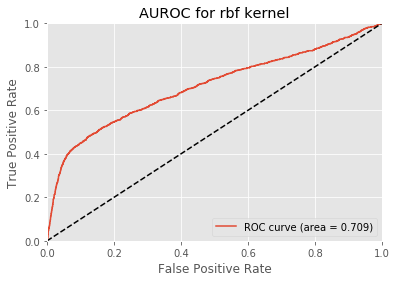

Area under the ROC curve : 0.709340


In [63]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('AUROC for rbf kernel')
pl.legend(loc="lower right")
pl.show()
print("Area under the ROC curve : %f" % roc_auc)

**LINEAR KERNEL**

In [64]:
#Linear Kernel
linear_svc = SVC(kernel='linear', probability=True)
linear_svc.fit(x_train, y_train)

#Predict
y_linear_pred = linear_svc.predict(x_test)

In [65]:
#Evaluation
linear_cm = confusion_matrix(y_test, y_linear_pred)
linear_cr = classification_report(y_test, y_linear_pred)
print(linear_cm)
print(linear_cr)

[[4371  318]
 [ 773  538]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4689
           1       0.63      0.41      0.50      1311

    accuracy                           0.82      6000
   macro avg       0.74      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000



In [66]:
acc_linear = metrics.accuracy_score(y_test, y_linear_pred)
prec_linear = metrics.precision_score(y_test,y_linear_pred)
rec_linear = metrics.recall_score(y_test,y_linear_pred)
f1_linear = metrics.f1_score(y_test,y_linear_pred)

In [67]:
#ROC 
prob_linear = linear_svc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_linear[:, 1])
roc_auc = auc(fpr, tpr)
roc_linear = metrics.roc_auc_score(y_test, y_linear_pred)

model = pd.DataFrame([['Support Vector Machine', acc_linear,prec_linear,rec_linear, f1_linear,roc_linear,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Support Vector Machine,0.818167,0.628505,0.410374,0.496539,0.671278,0.736352


In [68]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.01, 0.1, 1, 10]}
 
# Make grid search classifier
linear_grid = GridSearchCV(svm.SVC(kernel = 'linear'), param_grid, verbose=5, n_jobs = -1)
 
# Train the classifier
linear_grid.fit(x_train, y_train)
 
# clf = grid.best_Parameters_
print("Best Parameters:\n", linear_grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   36.2s remaining:   36.2s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   49.0s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 49.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 49.3min finished
Best Parameters:
 {'C': 10}


**After optimising the parameters**

In [69]:
#After Tuning 
new_linear_svc = SVC(kernel='linear', C=0.01, probability=True)
new_linear_svc.fit(x_train, y_train)

#Predict
new_y_linear_pred = new_linear_svc.predict(x_test)

In [70]:
#Evaluation
new_linear_cm = confusion_matrix(y_test, new_y_linear_pred)
new_linear_cr = classification_report(y_test, new_y_linear_pred)
print(new_linear_cm)
print(new_linear_cr)

[[4284  405]
 [ 739  572]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4689
           1       0.59      0.44      0.50      1311

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



In [71]:
acc_linear = metrics.accuracy_score(y_test, new_y_linear_pred)
prec_linear = metrics.precision_score(y_test,new_y_linear_pred)
rec_linear = metrics.recall_score(y_test,new_y_linear_pred)
f1_linear = metrics.f1_score(y_test,new_y_linear_pred)

In [72]:
#ROC 
new_prob_linear = new_linear_svc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, new_prob_linear[:, 1])
roc_auc = auc(fpr, tpr)
roc_linear = metrics.roc_auc_score(y_test, new_y_linear_pred)

model = pd.DataFrame([['Support Vector Machine', acc_linear,prec_linear,rec_linear, f1_linear,roc_linear,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Support Vector Machine,0.809333,0.585466,0.436308,0.5,0.674968,0.7424


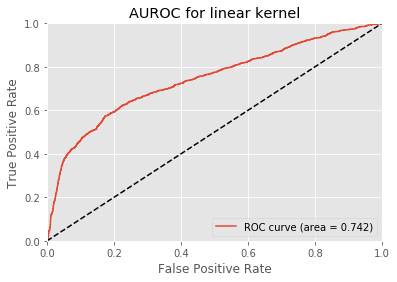

Area under the ROC curve : 0.742400


In [73]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('AUROC for linear kernel')
pl.legend(loc="lower right")
pl.show()
print("Area under the ROC curve : %f" % roc_auc)

After optimising the parameters, we found that both rbf and linear results improved based on f1_score

## kNN Model 

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [75]:
#kNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

#Predict
knn_pred1 = classifier.predict(x_test)

In [76]:
#Evaluation
cm = confusion_matrix(y_test, knn_pred1)
cr = classification_report(y_test, knn_pred1)
print(cm)
print(cr)

[[4302  387]
 [ 836  475]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4689
           1       0.55      0.36      0.44      1311

    accuracy                           0.80      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.80      0.78      6000



In [77]:
acc = metrics.accuracy_score(y_test, knn_pred1)
prec = metrics.precision_score(y_test,knn_pred1)
rec = metrics.recall_score(y_test,knn_pred1)
f1 = metrics.f1_score(y_test,knn_pred1)

In [78]:
#ROC 
knn_prob = classifier.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, knn_prob[:, 1])
roc_auc = auc(fpr, tpr)
roc = metrics.roc_auc_score(y_test, knn_pred1)

model = pd.DataFrame([['K', acc,prec,rec, f1,roc,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,K,0.796167,0.551044,0.362319,0.437184,0.639893,0.69854


In [80]:
# Finding best parameter
# Grid Search
# Parameter Grid
knn_param_grid = {'n_neighbors':list(range(1,15))}

knn_grid_search = GridSearchCV(KNeighborsClassifier() ,knn_param_grid ,cv=5,n_jobs=-1)

# Train the classifier
knn_grid_search= knn_grid_search.fit(x_train,y_train)
 
# clf = grid.best_Parameters_
print("Best Parameters:\n", knn_grid_search.best_params_)

Best Parameters:
 {'n_neighbors': 14}


**After optimising the parameters**

In [79]:
#kNN model
new_classifier = KNeighborsClassifier(n_neighbors=14)
new_classifier.fit(x_train, y_train)

#Predict
new_knn_pred = new_classifier.predict(x_test)

In [81]:
#Evaluation
cm = confusion_matrix(y_test, new_knn_pred)
cr = classification_report(y_test, new_knn_pred)
print(cm)
print(cr)

[[4474  215]
 [ 901  410]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4689
           1       0.66      0.31      0.42      1311

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [82]:
acc = metrics.accuracy_score(y_test, new_knn_pred)
prec = metrics.precision_score(y_test,new_knn_pred)
rec = metrics.recall_score(y_test,new_knn_pred)
f1 = metrics.f1_score(y_test,new_knn_pred)

In [83]:
#ROC 
new_knn_prob = new_classifier.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, new_knn_prob[:, 1])
roc_auc = auc(fpr, tpr)
roc = metrics.roc_auc_score(y_test, new_knn_pred)

model = pd.DataFrame([['k-Nearest-Neighbours', acc,prec,rec, f1,roc,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,k-Nearest-Neighbours,0.814,0.656,0.312738,0.423554,0.633443,0.737371


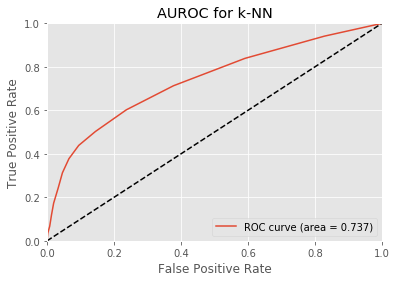

Area under the ROC curve : 0.737371


In [84]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('AUROC for k-NN')
pl.legend(loc="lower right")
pl.show()
print("Area under the ROC curve : %f" % roc_auc)

## Random Forest Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [86]:
#Random Forest Model
modelRandom = rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
modelRandomCV = sklearn.model_selection.cross_val_score(modelRandom, x_train, y_train, cv=5)
modelRandom = RandomForestClassifier(max_depth =3)
modelRandom.fit(x_train, y_train)

#Predict
y_rf_pred1 = modelRandom.predict(x_test)

In [87]:
#Evaluation 
cm = confusion_matrix(y_test, y_rf_pred1)
cr = classification_report(y_test, y_rf_pred1)
print(cm)
print(cr)

[[4539  150]
 [ 995  316]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4689
           1       0.68      0.24      0.36      1311

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [88]:
acc_rf = metrics.accuracy_score(y_test, y_rf_pred1)
prec_rf = metrics.precision_score(y_test,y_rf_pred1)
rec_rf = metrics.recall_score(y_test,y_rf_pred1)
f1_rf = metrics.f1_score(y_test,y_rf_pred1)

In [89]:
#ROC
prob_rf = modelRandom.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_rf_pred1)
roc_auc = auc(fpr, tpr)
roc_rf = metrics.roc_auc_score(y_test, y_rf_pred1)

model = pd.DataFrame([['Random Forest', acc_rf,prec_rf,rec_rf, f1_rf,roc_rf,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Random Forest,0.809167,0.678112,0.241037,0.355656,0.604524,0.604524


In [90]:
# Finding best parameter
# Grid Search
# Parameter Grid
rf_param_grid = {'n_estimators': [200, 400, 600, 800], 
              'criterion': ['entropy', 'gini']}

rf_grid_search = GridSearchCV(RandomForestClassifier() ,rf_param_grid ,cv=5,n_jobs=-1)

# Train the classifier
rf_grid_search = rf_grid_search.fit(x_train,y_train)
 
# clf = grid.best_Parameters_
print("Best Parameters:\n", rf_grid_search.best_params_)

Best Parameters:
 {'criterion': 'gini', 'n_estimators': 200}


**After optimising the parameters**

In [91]:
#Random Forest Model
modelRandom = rfc = RandomForestClassifier(n_estimators = 600,criterion = 'entropy')
modelRandomCV = sklearn.model_selection.cross_val_score(modelRandom, x_train, y_train, cv=5)
modelRandom.fit(x_train, y_train)

#Predict
y_rf_pred = modelRandom.predict(x_test)

In [92]:
#Evaluation 
cm = confusion_matrix(y_test, y_rf_pred)
cr = classification_report(y_test, y_rf_pred)
print(cm)
print(cr)

[[4424  265]
 [ 829  482]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4689
           1       0.65      0.37      0.47      1311

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [93]:
acc_rf = metrics.accuracy_score(y_test, y_rf_pred)
prec_rf = metrics.precision_score(y_test,y_rf_pred)
rec_rf = metrics.recall_score(y_test,y_rf_pred)
f1_rf = metrics.f1_score(y_test,y_rf_pred)

In [94]:
#ROC
prob_rf = modelRandom.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_rf_pred)
roc_auc = auc(fpr, tpr)
roc_rf = metrics.roc_auc_score(y_test, y_rf_pred)

model = pd.DataFrame([['Random Forest', acc_rf,prec_rf,rec_rf, f1_rf,roc_rf,roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','AUROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC,AUROC
0,Random Forest,0.817667,0.645248,0.367658,0.468416,0.655572,0.655572


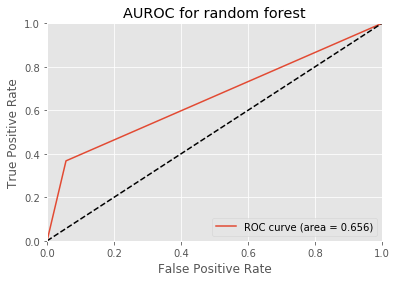

Area under the ROC curve : 0.655572


In [95]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('AUROC for random forest')
pl.legend(loc="lower right")
pl.show()
print("Area under the ROC curve : %f" % roc_auc)